In [17]:
!pip install matplotlib
!pip install seaborn



You should consider upgrading via the '/home/nina/Schreibtisch/HCI/Projekt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/nina/Schreibtisch/HCI/Projekt/venv/bin/python -m pip install --upgrade pip' command.


Part 1:
(693, 5)
Index(['Sample ID', 'Cancer Type Detailed', 'Overall Survival (months)',
       'Overall Survival', 'Sample Type'],
      dtype='object')
Sample type: 

Zuordnung:

{'First Metastasis': np.int64(0), 'First Recurrence': np.int64(1), 'Fourth recurrence': np.int64(2), 'Second Recurrence': np.int64(3), 'Third Recurrence': np.int64(4), 'Tumor Primary': np.int64(5)}
Random Forest Ergebnisse
Accuracy: 0.129

Confusion Matrix:
 [[ 0  0  3 49 13]
 [ 0  0  0  0  1]
 [ 0  0  0 16  0]
 [ 0  0  0  2  0]
 [ 0  0  2 37 16]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        16
           4       0.02      1.00      0.04         2
           5       0.53      0.29      0.38        55

    accuracy                           0.13       139
   macro avg       0.11      0.26      0.08       139
weighted 

/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

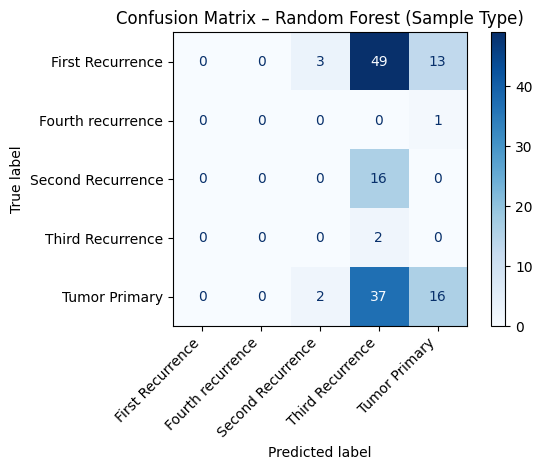

Logistic Regression Ergebnisse
Accuracy: 0.129

Confusion Matrix:
 [[ 5 49  3  0  8]
 [ 0  0  0  0  1]
 [ 0 16  0  0  0]
 [ 0  2  0  0  0]
 [ 3 37  2  0 13]]


ValueError: Number of classes, 5, does not match size of target_names, 6. Try specifying the labels parameter

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



clinical_data = pd.read_csv("hcai_data-main/difg_glass_clinical_data_reduced.tsv.txt", sep="\t")


print("Part 1:")
print(clinical_data.shape)
print(clinical_data.columns[:10])  # zeigt nur die ersten 10 Spalten


##### auf sample type klassifizieren
print("Sample type: \n")
#print(clinical_data["Sample Type"])
clinical_data = clinical_data.dropna(subset=["Sample Type"]) #leere werte dropen
#survival columns dropen
clinical_data= clinical_data.drop("Overall Survival", axis='columns')
clinical_data= clinical_data.drop("Overall Survival (months)", axis='columns')
#print(clinical_data)
#labels: First Metastasis, Tumor Primary, First Recurrence, Second Recurrence, Third Recurrence, Fourth recurrence

# extract data from overal survival
'''def extract_survival_class(val):
    try:
        return int(str(val).split(":")[0])  # nimmt 0 oder 1
    except:
        return np.nan

clinical_data["Survival_Class"] = clinical_data["Overall Survival"].apply(extract_survival_class)
'''
# 
cols = [
    "Sample Type",
    "Cancer Type Detailed"
]
df = clinical_data[cols].copy()

# handle nan values
#df["Age"] = df["Age"].fillna(df["Age"].median())
#df["Radiation Dose"] = df["Radiation Dose"].fillna(0)


df_encoded = pd.get_dummies(df,
    columns=[
              "Cancer Type Detailed"],
    drop_first=True
)

#label encoder verwenden, damit z.B. 0 = First Recurrence
encoder = LabelEncoder()
y = encoder.fit_transform(df_encoded["Sample Type"])
print("Zuordnung:\n")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

X = df_encoded.drop(columns=["Sample Type"])#features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train - random forest
model = RandomForestClassifier(class_weight="balanced",random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Random Forest Ergebnisse")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=encoder.classes_, cmap='Blues')
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
class_names = encoder.inverse_transform(labels)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap='Blues'
)
plt.title("Confusion Matrix – Random Forest (Sample Type)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


log_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Ergebnisse")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_log, target_names=encoder.classes_))

#ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, display_labels=encoder.classes_, cmap='Oranges')
labels_log = unique_labels(y_test, y_pred_log)
class_names_log = encoder.inverse_transform(labels_log)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log,
    display_labels=class_names_log,
    cmap='Oranges'
)
plt.title("Confusion Matrix – Logistic Regression (Sample Type)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

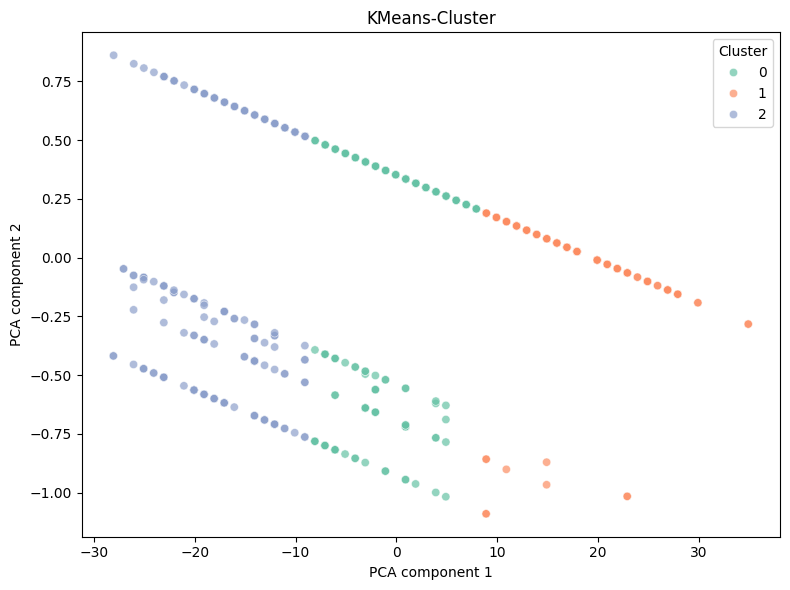

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [48]:

#y = df_encoded["Sample Type"] #target

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

X["Cluster"] = clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", alpha=0.7)
plt.title("KMeans-Cluster")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


df_analysis = df_encoded.copy()
df_analysis["Cluster"] = clusters
df_analysis["Survival_Class"] = y.values

cluster_summary = df_analysis.groupby("Cluster")["Survival_Class"].value_counts(normalize=True).unstack()
cluster_summary.columns = ["1:DECEASED", "0:LIVING"]
print(cluster_summary.round(2))

cluster_summary.plot(kind="bar", stacked=True, colormap="Set3")
plt.title("Survival per Cluster")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title="Survival_Class")
plt.tight_layout()
plt.show()


# train - random forest
model = RandomForestClassifier(class_weight="balanced",random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#train - logic regression
log_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# visualize
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix – Survival Classification")
plt.tight_layout()
plt.show()

# f1 score für verstorbene ziemlich gut (0.84)
# f1 Wert für lebende Patienten ausbaufähig (0.52)
# gesamtaccuracy ok
# modell erkennt lebende patienten noch schlecht



print(" Logistic Regression Ergebnisse")
print(" Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("\n Classification Report:\n", classification_report(y_test, y_pred_log))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()
